## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

#optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr = 0.01, decay = 1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.8489 - accuracy: 0.3378 - val_loss: 2.0189 - val_accuracy: 0.3099
Epoch 2/500
50000/50000 [==============================] - 7s 146us/step - loss: 1.6393 - accuracy: 0.4188 - val_loss: 1.5980 - val_accuracy: 0.4300
Epoch 3/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.5523 - accuracy: 0.4517 - val_loss: 1.6664 - val_accuracy: 0.4122
Epoch 4/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.4880 - accuracy: 0.4715 - val_loss: 1.5432 - val_accuracy: 0.4538
Epoch 5/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.4365 - accuracy: 0.4912 - val_loss: 1.4981 - val_accuracy: 0.4633
Epoch 6/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.3946 - accuracy: 0.5069 - val_loss: 1.5124 - val_accuracy: 0.4662
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 7s 144us/step - loss: 0.3447 - accuracy: 0.8806 - val_loss: 2.2051 - val_accuracy: 0.5183
Epoch 56/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.3378 - accuracy: 0.8809 - val_loss: 2.1227 - val_accuracy: 0.5200
Epoch 57/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.3290 - accuracy: 0.8846 - val_loss: 2.7852 - val_accuracy: 0.4730
Epoch 58/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.3293 - accuracy: 0.8830 - val_loss: 2.2819 - val_accuracy: 0.5197
Epoch 59/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.3000 - accuracy: 0.8951 - val_loss: 2.3124 - val_accuracy: 0.5248
Epoch 60/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.2902 - accuracy: 0.8973 - val_loss: 2.5113 - val_accuracy: 0.5094
Epoch 61/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.2981 - accuracy: 0.8948 - val

50000/50000 [==============================] - 7s 145us/step - loss: 0.0972 - accuracy: 0.9667 - val_loss: 3.9226 - val_accuracy: 0.5251
Epoch 110/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.1249 - accuracy: 0.9557 - val_loss: 3.8413 - val_accuracy: 0.5251
Epoch 111/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.1104 - accuracy: 0.9606 - val_loss: 3.7122 - val_accuracy: 0.5263
Epoch 112/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.0891 - accuracy: 0.9690 - val_loss: 4.1852 - val_accuracy: 0.5163
Epoch 113/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.0867 - accuracy: 0.9692 - val_loss: 3.8325 - val_accuracy: 0.5332
Epoch 114/500
50000/50000 [==============================] - 7s 144us/step - loss: 0.0798 - accuracy: 0.9718 - val_loss: 3.9241 - val_accuracy: 0.5291
Epoch 115/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.0816 - accuracy: 0.9716

50000/50000 [==============================] - 7s 141us/step - loss: 4.6430e-04 - accuracy: 1.0000 - val_loss: 4.7044 - val_accuracy: 0.5556
Epoch 164/500
50000/50000 [==============================] - 7s 146us/step - loss: 4.4492e-04 - accuracy: 1.0000 - val_loss: 4.7178 - val_accuracy: 0.5547
Epoch 165/500
50000/50000 [==============================] - 7s 141us/step - loss: 4.3537e-04 - accuracy: 1.0000 - val_loss: 4.7190 - val_accuracy: 0.5525
Epoch 166/500
50000/50000 [==============================] - 7s 144us/step - loss: 4.3393e-04 - accuracy: 1.0000 - val_loss: 4.7330 - val_accuracy: 0.5524
Epoch 167/500
50000/50000 [==============================] - 7s 141us/step - loss: 4.1837e-04 - accuracy: 1.0000 - val_loss: 4.7351 - val_accuracy: 0.5536
Epoch 168/500
50000/50000 [==============================] - 7s 141us/step - loss: 4.1576e-04 - accuracy: 1.0000 - val_loss: 4.7385 - val_accuracy: 0.5530
Epoch 169/500
50000/50000 [==============================] - 7s 146us/step - loss: 4

Epoch 216/500
50000/50000 [==============================] - 7s 140us/step - loss: 2.3187e-04 - accuracy: 1.0000 - val_loss: 4.9236 - val_accuracy: 0.5530
Epoch 217/500
50000/50000 [==============================] - 7s 145us/step - loss: 2.2994e-04 - accuracy: 1.0000 - val_loss: 4.9282 - val_accuracy: 0.5534
Epoch 218/500
50000/50000 [==============================] - 7s 140us/step - loss: 2.2977e-04 - accuracy: 1.0000 - val_loss: 4.9296 - val_accuracy: 0.5534
Epoch 219/500
50000/50000 [==============================] - 7s 145us/step - loss: 2.2706e-04 - accuracy: 1.0000 - val_loss: 4.9345 - val_accuracy: 0.5547
Epoch 220/500
50000/50000 [==============================] - 7s 140us/step - loss: 2.2485e-04 - accuracy: 1.0000 - val_loss: 4.9362 - val_accuracy: 0.5537
Epoch 221/500
50000/50000 [==============================] - 7s 145us/step - loss: 2.2302e-04 - accuracy: 1.0000 - val_loss: 4.9366 - val_accuracy: 0.5536
Epoch 222/500
50000/50000 [==============================] - 7s 141us/

Epoch 269/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.6335e-04 - accuracy: 1.0000 - val_loss: 5.0455 - val_accuracy: 0.5534
Epoch 270/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.6236e-04 - accuracy: 1.0000 - val_loss: 5.0468 - val_accuracy: 0.5541
Epoch 271/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.6132e-04 - accuracy: 1.0000 - val_loss: 5.0508 - val_accuracy: 0.5551
Epoch 272/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.6110e-04 - accuracy: 1.0000 - val_loss: 5.0518 - val_accuracy: 0.5539
Epoch 273/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.6016e-04 - accuracy: 1.0000 - val_loss: 5.0514 - val_accuracy: 0.5542
Epoch 274/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.5867e-04 - accuracy: 1.0000 - val_loss: 5.0568 - val_accuracy: 0.5537
Epoch 275/500
50000/50000 [==============================] - 7s 144us/

Epoch 322/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2744e-04 - accuracy: 1.0000 - val_loss: 5.1356 - val_accuracy: 0.5547
Epoch 323/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.2714e-04 - accuracy: 1.0000 - val_loss: 5.1369 - val_accuracy: 0.5548
Epoch 324/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2657e-04 - accuracy: 1.0000 - val_loss: 5.1380 - val_accuracy: 0.5546
Epoch 325/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2592e-04 - accuracy: 1.0000 - val_loss: 5.1392 - val_accuracy: 0.5549
Epoch 326/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.2564e-04 - accuracy: 1.0000 - val_loss: 5.1420 - val_accuracy: 0.5541
Epoch 327/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.2517e-04 - accuracy: 1.0000 - val_loss: 5.1438 - val_accuracy: 0.5551
Epoch 328/500
50000/50000 [==============================] - 8s 150us/

Epoch 375/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.0497e-04 - accuracy: 1.0000 - val_loss: 5.2063 - val_accuracy: 0.5550
Epoch 376/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.0472e-04 - accuracy: 1.0000 - val_loss: 5.2089 - val_accuracy: 0.5555
Epoch 377/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.0432e-04 - accuracy: 1.0000 - val_loss: 5.2102 - val_accuracy: 0.5545
Epoch 378/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.0397e-04 - accuracy: 1.0000 - val_loss: 5.2113 - val_accuracy: 0.5552
Epoch 379/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.0348e-04 - accuracy: 1.0000 - val_loss: 5.2111 - val_accuracy: 0.5549
Epoch 380/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.0334e-04 - accuracy: 1.0000 - val_loss: 5.2130 - val_accuracy: 0.5547
Epoch 381/500
50000/50000 [==============================] - 7s 144us/

Epoch 428/500
50000/50000 [==============================] - 7s 144us/step - loss: 8.9506e-05 - accuracy: 1.0000 - val_loss: 5.2669 - val_accuracy: 0.5553
Epoch 429/500
50000/50000 [==============================] - 7s 140us/step - loss: 8.9334e-05 - accuracy: 1.0000 - val_loss: 5.2691 - val_accuracy: 0.5549
Epoch 430/500
50000/50000 [==============================] - 7s 144us/step - loss: 8.9061e-05 - accuracy: 1.0000 - val_loss: 5.2703 - val_accuracy: 0.5555
Epoch 431/500
50000/50000 [==============================] - 7s 141us/step - loss: 8.8547e-05 - accuracy: 1.0000 - val_loss: 5.2711 - val_accuracy: 0.5550
Epoch 432/500
50000/50000 [==============================] - 7s 145us/step - loss: 8.8609e-05 - accuracy: 1.0000 - val_loss: 5.2707 - val_accuracy: 0.5551
Epoch 433/500
50000/50000 [==============================] - 7s 141us/step - loss: 8.8396e-05 - accuracy: 1.0000 - val_loss: 5.2735 - val_accuracy: 0.5551
Epoch 434/500
50000/50000 [==============================] - 7s 141us/

Epoch 481/500
50000/50000 [==============================] - 7s 145us/step - loss: 7.8189e-05 - accuracy: 1.0000 - val_loss: 5.3190 - val_accuracy: 0.5543
Epoch 482/500
50000/50000 [==============================] - 7s 140us/step - loss: 7.7926e-05 - accuracy: 1.0000 - val_loss: 5.3199 - val_accuracy: 0.5553
Epoch 483/500
50000/50000 [==============================] - 7s 145us/step - loss: 7.7707e-05 - accuracy: 1.0000 - val_loss: 5.3214 - val_accuracy: 0.5555
Epoch 484/500
50000/50000 [==============================] - 7s 141us/step - loss: 7.7579e-05 - accuracy: 1.0000 - val_loss: 5.3212 - val_accuracy: 0.5551
Epoch 485/500
50000/50000 [==============================] - 7s 140us/step - loss: 7.7348e-05 - accuracy: 1.0000 - val_loss: 5.3223 - val_accuracy: 0.5549
Epoch 486/500
50000/50000 [==============================] - 7s 146us/step - loss: 7.7210e-05 - accuracy: 1.0000 - val_loss: 5.3238 - val_accuracy: 0.5552
Epoch 487/500
50000/50000 [==============================] - 7s 141us/

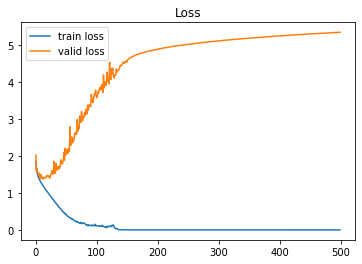

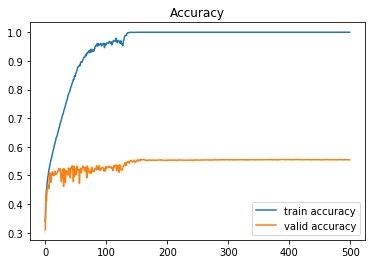

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()